In [245]:

#Quick introduction and first handling of the dataset :
import pandas as pd

# Load the dataset
df = pd.read_csv('https://query.data.world/s/kqie3njk5bv6yvtbgd4ss2dkbc6vml?dws=00000')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display the first few rows of the dataset
print("\nFirst Few Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Unique values in each column
print("\nUnique Values in Each Column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

# Value counts for specific columns
print("\nValue Counts:")
print("Segment Type:")
print(df['Segment Type'].value_counts())
print("\nSegment Description:")
print(df['Segment Description'].value_counts())
print("\nAnswer:")
print(df['Answer'].value_counts())




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Question             5460 non-null   object 
 1   Segment Type         5460 non-null   object 
 2   Segment Description  5460 non-null   object 
 3   Answer               5460 non-null   object 
 4   Count                5460 non-null   int64  
 5   Percentage           5460 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB
None

First Few Rows:
                                            Question Segment Type  \
0  What do you think when an influencer is obviou...       Mobile   
1  What do you think when an influencer is obviou...       Mobile   
2  What do you think when an influencer is obviou...       Mobile   
3  What do you think when an influencer is obviou...       Mobile   
4  What do you think when an influencer is obviou

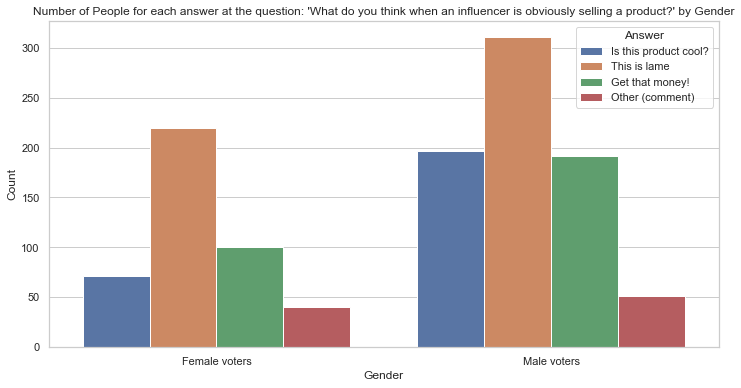

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('https://query.data.world/s/kqie3njk5bv6yvtbgd4ss2dkbc6vml?dws=00000')

# Choose the first question
question = df['Question'][0]

# Filter data for the selected question
selected_question_data = df[df['Question'] == question]

# Plot the bar chart for 'Male voters' and 'Female voters'
male_female_data = selected_question_data[selected_question_data['Segment Description'].isin(['Male voters', 'Female voters'])]
plt.figure(figsize=(12, 6))
sns.barplot(data=male_female_data, x='Segment Description', y='Count', hue='Answer')
plt.title("Number of People for each answer at the question: 'What do you think when an influencer is obviously selling a product?' by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()



In [247]:
import pandas as pd

# Load the dataset
df = pd.read_csv('https://query.data.world/s/kqie3njk5bv6yvtbgd4ss2dkbc6vml?dws=00000')

# Display unique values in the "Question" column
unique_questions = df['Question'].unique()
print("Unique Questions:")
print(unique_questions)


Unique Questions:
['What do you think when an influencer is obviously selling a product?'
 'What social platform has influenced your online shopping most?'
 'What is the most important trait when defining an influencer?'
 'Who are your favorite people to follow online?'
 'Does it annoy you when popular social media accounts endorse products or services?'
 'What do you consider an influencer?']


In [248]:
# Check unique values in the 'Segment Type' column
unique_segment_types = df['Segment Type'].unique()
print("Unique Segment Types:", unique_segment_types)


Unique Segment Types: ['Mobile' 'Web' 'Gender' 'University' 'Custom']


In [249]:
# Check unique values in the 'Segment description' column
unique_segment_description = df['Segment Description'].unique()
print("Unique Segment description:", unique_segment_description)

Unique Segment description: ['Global results' 'Web' 'Female voters' 'Male voters'
 'Vanderbilt University' 'University of California, Berkeley'
 'Texas Christian University' 'University of Missouri' 'Emory University'
 'University of Washington' 'Purdue University' 'Dartmouth College'
 'Johns Hopkins University' 'University of Redlands'
 'University of Richmond' 'University of North Carolina'
 'Stanford University' 'University of Arkansas' 'Indiana University'
 'Whitman College' 'University of Wisconsin-Madison'
 'Santa Clara University' 'University of Arizona' 'University of Michigan'
 'University of Illinois' 'Missouri State University'
 'University of Texas' 'Randolph-Macon College' 'Cornell University'
 'San Diego State University' 'Vassar College'
 'Loyola Marymount University' 'North Dakota State University'
 'Claremont McKenna College' 'Duke University' 'Chapman University'
 'College of William and Mary' 'University of Virginia' 'SF'
 'Northwestern University' 'University of New

In [250]:
#reprocessing an data cleaning



import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Charger le dataset
df = pd.read_csv('https://query.data.world/s/kqie3njk5bv6yvtbgd4ss2dkbc6vml?dws=00000')

# Sélectionner la colonne "Segment Description"
descriptions = df['Segment Description']

# Prétraitement du texte
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    # Keep certain expressions intact
    text_preserve_gpa = re.sub(r'below 1.0', 'below_1.0', text, flags=re.IGNORECASE)
    
    # Remove emojis using a regular expression
    text_no_emojis = re.sub(r'[^\w\s]', '', text_preserve_gpa.encode('ascii', 'ignore').decode('ascii')).strip()
    
    # Tokenization and stemming
    words = nltk.word_tokenize(text_no_emojis)
    words = [ps.stem(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

# Apply preprocessing to each description
preprocessed_descriptions = descriptions.apply(preprocess_text)

# Example of "Segment Description" before and after emoji cleaning
example_description = "What's your GPA? Below 1.0 😁"

# Before cleaning
print("Original Description:")
print(example_description)

# After cleaning
cleaned_description = preprocess_text(example_description)
print("\nCleaned Description:")
print(cleaned_description)

# Print a few preprocessed descriptions for checking
print("\nOriginal Descriptions:")
print(descriptions.head())

print("\nPreprocessed Descriptions:")
print(preprocessed_descriptions.head())

# Vectorisation TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(preprocessed_descriptions)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original Description:
What's your GPA? Below 1.0 😁

Cleaned Description:
what gpa

Original Descriptions:
0    Global results
1    Global results
2    Global results
3    Global results
4               Web
Name: Segment Description, dtype: object

Preprocessed Descriptions:
0    global result
1    global result
2    global result
3    global result
4              web
Name: Segment Description, dtype: object


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cluster 1 Top Terms: major, colleg, school, ye, vote, high, close, identifi
Cluster 2 Top Terms: univers, state, texa, missouri, washington, central, florida, arkansa
Cluster 3 Top Terms: gpa, zodiac, greek, geneso, georg, georgia, girl, global
Cluster 4 Top Terms: zodiac, sign, jan, dec, sep, aug, jul, jun


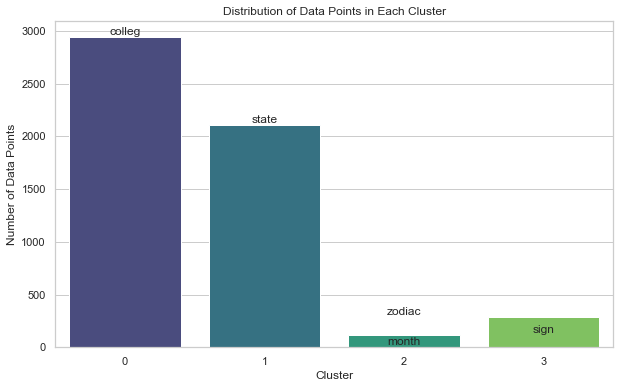

In [251]:
#CLUSTERING

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS  # Add STOPWORDS
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv('https://query.data.world/s/kqie3njk5bv6yvtbgd4ss2dkbc6vml?dws=00000')
# Select the "Segment Description" column
descriptions = df['Segment Description']

# Text preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    # Remove emojis using a regular expression
    text_no_emojis = re.sub(r'\s+', ' ', text.encode('ascii', 'ignore').decode('ascii')).strip()
    
    # Tokenization and stemming
    words = nltk.word_tokenize(text_no_emojis)
    words = [ps.stem(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

# Apply preprocessing to each description
preprocessed_descriptions = descriptions.apply(preprocess_text)

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(preprocessed_descriptions)

# Apply K-Means clustering
num_clusters = 4  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_tfidf)

# Print top terms for each cluster
terms_per_cluster = []
feature_names = vectorizer.get_feature_names()
for i in range(num_clusters):
    cluster_center = kmeans.cluster_centers_[i]
    top_terms_idx = cluster_center.argsort()[-8:][::-1]  
    top_terms = [feature_names[idx] for idx in top_terms_idx]
    terms_per_cluster.append(top_terms)
    print(f"Cluster {i+1} Top Terms: {', '.join(top_terms)}")



import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Count the number of data points in each cluster
cluster_counts = df['Cluster'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")

# Annotate each bar with the first key term
for i, cluster_count in enumerate(cluster_counts):
    plt.text(i, cluster_count + 0.1, terms_per_cluster[i][1], ha='center', va='bottom')
plt.text(2, 0.1, 'month', ha='center', va='bottom')
plt.title('Distribution of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.show()




In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import os

# Load the dataset
df = pd.read_csv('https://query.data.world/s/kqie3njk5bv6yvtbgd4ss2dkbc6vml?dws=00000')

df.rename(columns = {   'Question': 'question', 'Segment Type': 'segment_type'
                        ,'Segment Description': 'segment_description', 'Answer': 'answer',
                        'Count': 'count', 'Percentage': 'percent'}, inplace = True)

# total Facebook users in University
Uni_face = sum(df[(df.segment_type == 'University') & (df.answer == 'Facebook')]['count'])

# total Instagram users in University
Uni_ins = sum(df[(df.segment_type == 'University') & (df.answer == 'Instagram')]['count'])

# total Snapchat users in University
Uni_snap = sum(df[(df.segment_type == 'University') & (df.answer == 'Snapchat')]['count'])

# total Twitter users in University
Uni_twi = sum(df[(df.segment_type == 'University') & (df.answer == 'Twitter')]['count'])

# total None users in University
Uni_non = sum(df[(df.segment_type == 'University') & (df.answer == 'None')]['count'])

data = [Uni_face, Uni_ins, Uni_snap, Uni_twi, Uni_non]
labels = ['Facebook', 'Instagram', 'Twitter', 'Snapchat', 'None']

colors = sns.color_palette("hls", 10)

fig = go.Figure(data=[go.Pie(labels=labels, values=data, hole=.5)])
fig.update_layout(title_text='Most Popular Social Media Platform in University')
fig.show()

Now let's use another dataset about instagram to understand what's make poeple being more influenced

In [253]:
import os
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
def convert(x):
    return re.findall('\d+\.?\d*',x)
def change(df,list1):
    for i in list1:
        df['new'+i]=df[i].apply(convert)
        df['new'+i]=df['new'+i].apply(lambda x: "".join(x))
        df['new'+i]=pd.to_numeric(df['new'+i])
        df['new'+i]=np.where(['M' in j for j in df[i]],df['new'+i]*1000000,
                             np.where(['K' in j1 for j1 in df[i]],df['new'+i]*1000,df['new'+i]))
    return df


df_i=pd.read_csv('C:/Users/USER/Desktop/seconddataset.csv')
df_i.rename({'category_1':'Category','Audience country(mostly)':'Audience Country',},axis=1,inplace=True)
df_i.drop(labels=['Influencer insta name','Authentic engagement\r\n',],axis=1,inplace=True)

li=['Followers','Engagement avg\r\n']
change(df_i,li)
df_i.head(2)
# instagram dataset



,instagram name,Category,category_2,Followers,Audience Country,Engagement avg\r\n,newFollowers,newEngagement avg\r\n
0,433,Sports with a ball,NaN,48.5M,Spain,637K,48500000.0,637000.0
1,TAEYANG,Music,NaN,12.7M,Indonesia,542.3K,12700000.0,542300.0


<AxesSubplot:title={'center':'Top 15 most followed celebrity on instagram'}, xlabel='newFollowers', ylabel='instagram name'>

c:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 129293 missing from current font.

c:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

Glyph 129293 missing from current font.



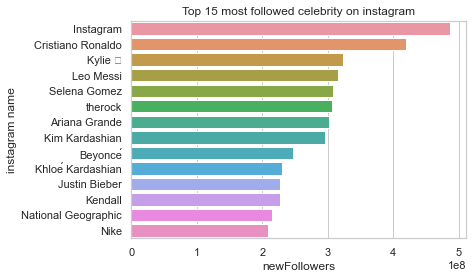

In [254]:
df_i.sort_values(by='newFollowers',ascending=False,ignore_index=True).iloc[0:15,[0,1,3,-1]]
plt.title('Top 15 most followed celebrity on instagram')
plt.xlabel('Followers in Million')
sns.barplot(y='instagram name',x='newFollowers',data=df_i.sort_values(by='newFollowers',ascending=False).head(15))

<AxesSubplot:title={'center':'Top 15 most followed celebrity on instagram'}, xlabel='newEngagement avg\r\n', ylabel='instagram name'>

c:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 13 missing from current font.

c:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 129293 missing from current font.

c:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 48124 missing from current font.

c:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 50980 missing from current font.

c:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 44592 missing from current font.

c:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

Glyph 13 missing from current font

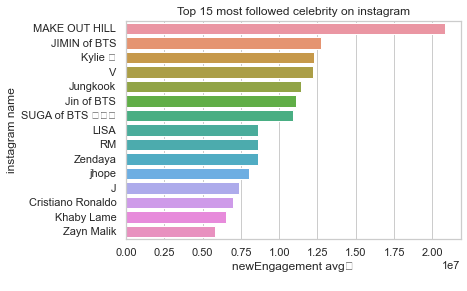

In [255]:
df_i.sort_values(by='newEngagement avg\r\n',ascending=False,ignore_index=True).iloc[0:15,[0,1,3,-1]]
plt.title('Top 15 most followed celebrity on instagram')
plt.xlabel('Followers in Million')
sns.barplot(y='instagram name',x='newEngagement avg\r\n',data=df_i.sort_values(by='newEngagement avg\r\n',ascending=False).head(15))

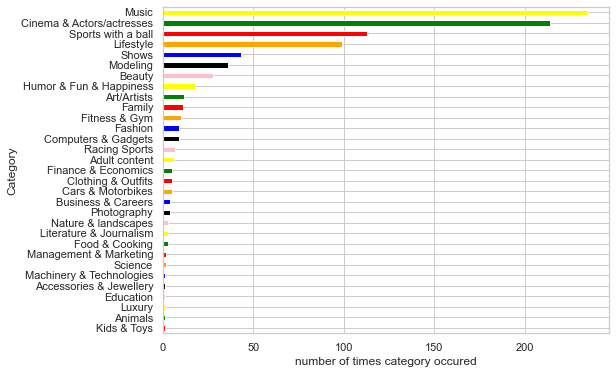

In [256]:
pallete=['red','green','yellow','pink','black','blue','orange']
def plot(df):
    plt.figure(figsize=(8,6))
    plt.xlabel('number of times category occured')
    plt.ylabel('Category')
    df['Category'].value_counts().sort_values(ascending=True).plot.barh(color=pallete)
plot(df_i)

<AxesSubplot:>

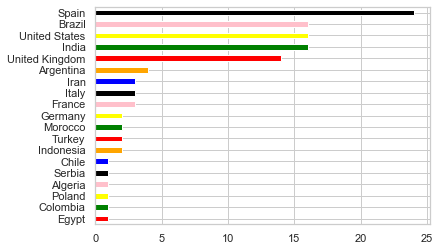

In [257]:
def demand(data,category):
    return data[data['Category']==category]['Audience Country'].value_counts().sort_values(ascending=True).plot.barh(color=pallete)
demand(df_i,'Sports with a ball')